<a href="https://colab.research.google.com/github/fernandes-alisson/MyFirstProject/blob/master/Regressao_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# VISUALIZAÇÃO DO DATASET
df = pd.read_csv('/content/drive/MyDrive/Curso/Regressao/REGRESSÃO_LINEAR/housing.csv', sep=",", encoding="iso-8859-1")

In [ ]:
# VISUALIZAÇÃO DOS CINCO PRIMEIROS VALORES
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [ ]:
df.shape

(489, 4)

# **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

VALOR MISSING (NaN)

In [ ]:
# RELAÇÃO DE QUANTIS
df.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


ANÁLISE DOS TIPOS DE ATRIBUTOS

In [ ]:
# OBJECT -> STRING
# INT64 -> INTEIRO
# FLOAT64 -> REAIS
# COMPLEX -> COMPLEXOS
df.dtypes

,0
RM,float64
LSTAT,float64
PTRATIO,float64
MEDV,float64


DADOS ESTATÍSTICOS


In [ ]:
# ANÁLISE ESTATÍSTICA
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


ANÁLISE DOS OUTLIERS

In [ ]:
import plotly.express as px

In [ ]:
# GRÁFICO DE BOXPLOT
boxplot = px.box(df, y="RM")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="LSTAT")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="PTRATIO")
boxplot.show()

# **CORRELAÇÃO LINEAR**

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0



**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [ ]:
import matplotlib.pyplot as plt

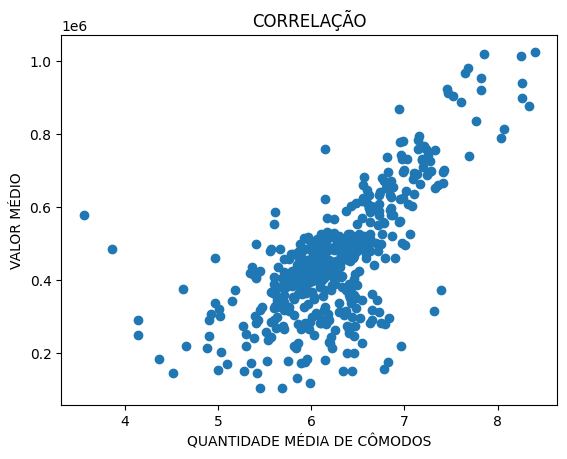

In [ ]:
plt.scatter(df['RM'], df['MEDV'])
plt.title("CORRELAÇÃO")
plt.xlabel("QUANTIDADE MÉDIA DE CÔMODOS")
plt.ylabel("VALOR MÉDIO")
plt.show()

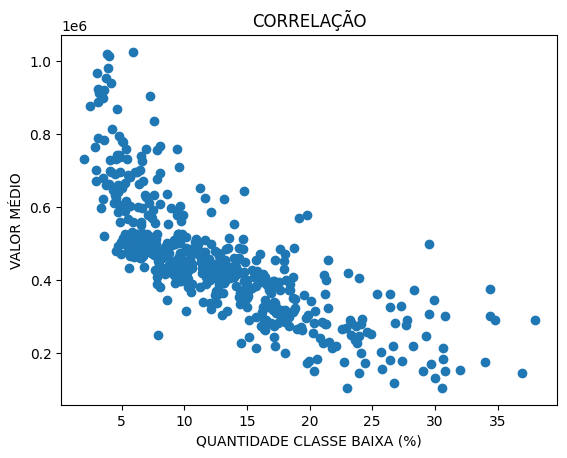

In [ ]:
plt.scatter(df['LSTAT'], df['MEDV'])
plt.title("CORRELAÇÃO")
plt.xlabel("QUANTIDADE CLASSE BAIXA (%)")
plt.ylabel("VALOR MÉDIO")
plt.show()

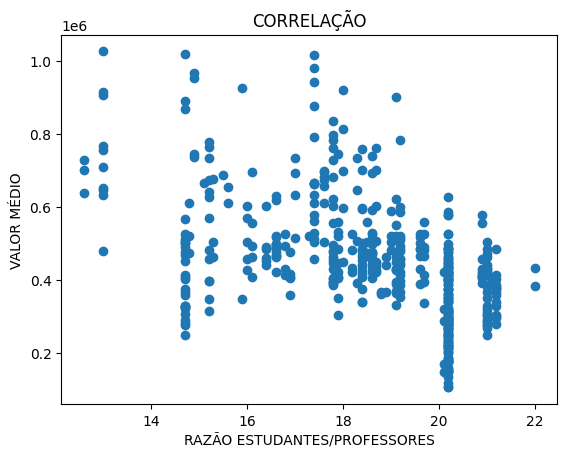

In [ ]:
plt.scatter(df['PTRATIO'], df['MEDV'])
plt.title("CORRELAÇÃO")
plt.xlabel("RAZÃO ESTUDANTES/PROFESSORES")
plt.ylabel("VALOR MÉDIO")
plt.show()

In [ ]:
import seaborn as sns

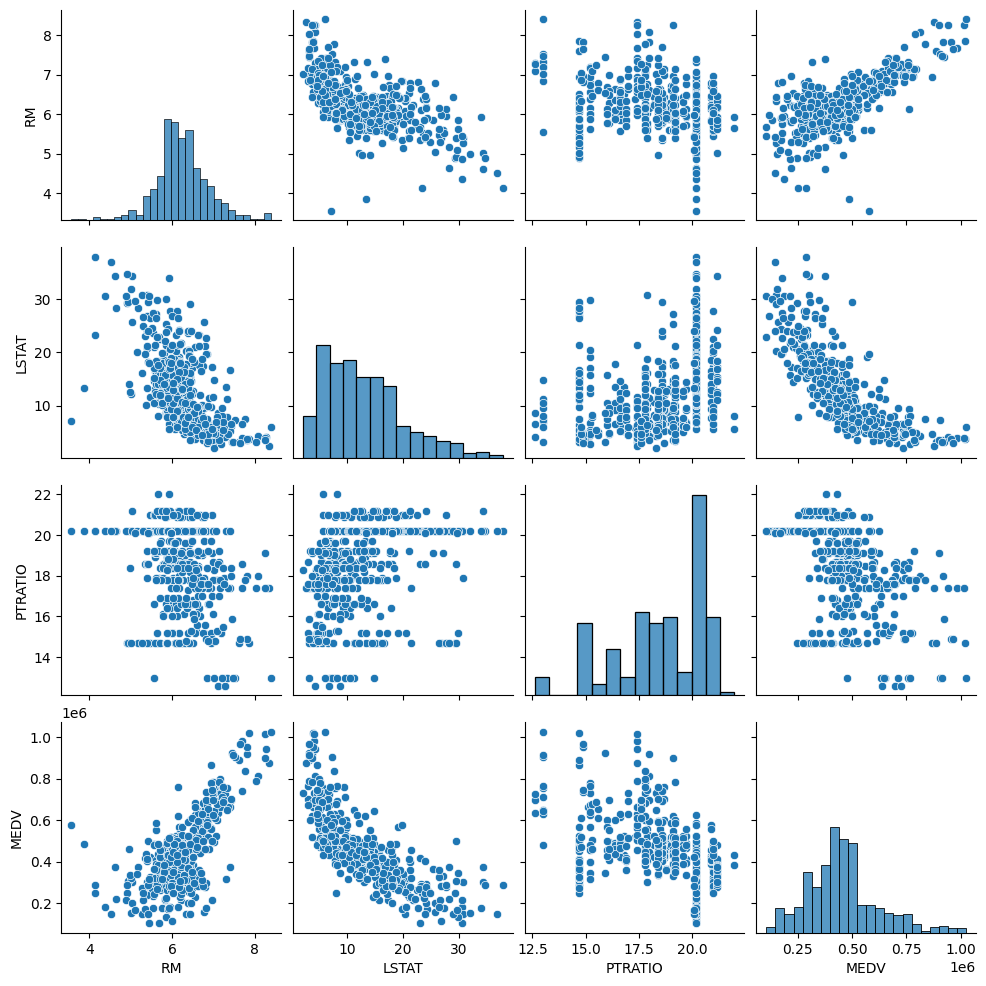

In [ ]:
sns.pairplot(df);

# **ANÁLISE DE NORMALIDADE**

Gráfico QQ-Plot

In [ ]:
import scipy.stats as stats

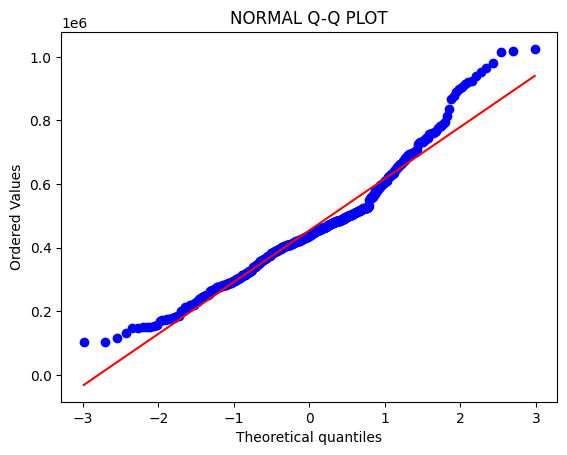

In [ ]:
stats.probplot(df['MEDV'], dist="norm", plot=plt)
plt.title("NORMAL Q-Q PLOT")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
hist = px.histogram(df, x="MEDV", nbins=60)
hist.update_layout(width=800, height=500, title_text='MÉDIA DOS VALORES')
hist.show()

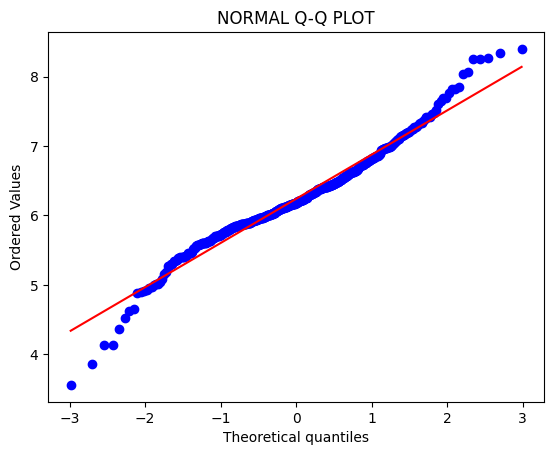

In [ ]:
stats.probplot(df['RM'], dist="norm", plot=plt)
plt.title("NORMAL Q-Q PLOT")
plt.show()

In [ ]:
hist = px.histogram(df, x="RM", nbins=60)
hist.update_layout(width=800, height=500, title_text='MÉDIA DOS VALORES')
hist.show()

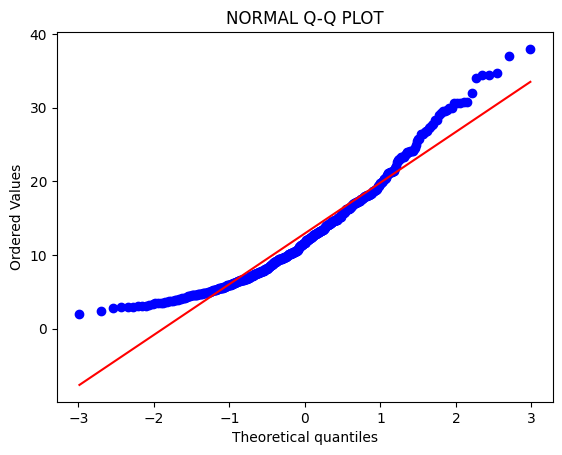

In [ ]:
stats.probplot(df['LSTAT'], dist="norm", plot=plt)
plt.title("NORMAL Q-Q PLOT")
plt.show()

In [ ]:
hist = px.histogram(df, x="LSTAT", nbins=60)
hist.update_layout(width=800, height=500, title_text='MÉDIA DOS VALORES')
hist.show()

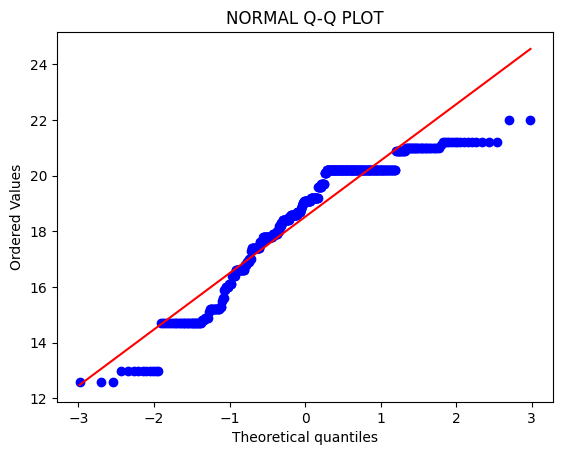

In [ ]:
stats.probplot(df['PTRATIO'], dist="norm", plot=plt)
plt.title("NORMAL Q-Q PLOT")
plt.show()

In [ ]:
hist = px.histogram(df, x="PTRATIO", nbins=60)
hist.update_layout(width=800, height=500, title_text='MÉDIA DOS VALORES')
hist.show()

Teste Shapiro-Wilk

*Teste para verifiar a normalidade de uma distribuição de dados*

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
stats.shapiro(df['MEDV'])

ShapiroResult(statistic=0.9596616055953767, pvalue=2.5759801704018553e-10)

In [ ]:
estatistica, p = stats.shapiro(df['MEDV'])
print("Estatística = %.3f, p-valor = %.3f" % (estatistica, p))

Estatística = 0.960, p-valor = 0.000


In [ ]:
estatistica, p = stats.shapiro(df['RM'])
print("Estatística = %.3f, p-valor = %.3f" % (estatistica, p))

Estatística = 0.971, p-valor = 0.000


In [ ]:
estatistica, p = stats.shapiro(df['LSTAT'])
print("Estatística = %.3f, p-valor = %.3f" % (estatistica, p))

Estatística = 0.937, p-valor = 0.000


In [ ]:
estatistica, p = stats.shapiro(df['PTRATIO'])
print("Estatística = %.3f, p-valor = %.3f" % (estatistica, p))

Estatística = 0.906, p-valor = 0.000


Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = lilliefors(df['MEDV'])
print("Estatística = %.3f, p-valor = %.3f" % (estatistica, p))

Estatística = 0.114, p-valor = 0.001


In [ ]:
estatisca, p = lilliefors(df['RM'])
print("Estatística = %.3f, p-valor = %.3f" % (estatistica, p))

Estatística = 0.114, p-valor = 0.001


In [ ]:
estatistica, p = lilliefors(df['LSTAT'])
print("Estatística = %.3f, p-valor = %.3f" % (estatistica, p))

Estatística = 0.088, p-valor = 0.001


In [ ]:
estatistica, p = lilliefors(df['PTRATIO'])
print("Estatística = %.3f, p-valor = %.3f" % (estatistica, p))

Estatística = 0.176, p-valor = 0.001


### CORRELAÇÃO LINEAR

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [ ]:
# PEARSON
#coef, p = stats.pearsonr(df['MEDV'], df['RM'])
#print("Coeficiente ={} , p-valor ={} ".format(coef, p))

In [ ]:
# SPEARMAN
coef, p = stats.spearmanr(df['MEDV'], df['RM'])
print("Coeficiente = %.3f, p-valor = %.3f" % (coef, p))

Coeficiente = 0.624, p-valor = 0.000


In [ ]:
#coef, p = stats.kendalltau(df['MEDV'], df['LSTAT'])
#print("Coeficiente = %.3f, p-valor = %.3f" % (coef, p))

In [ ]:
correlacao = df.corr(method='spearman')
correlacao

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


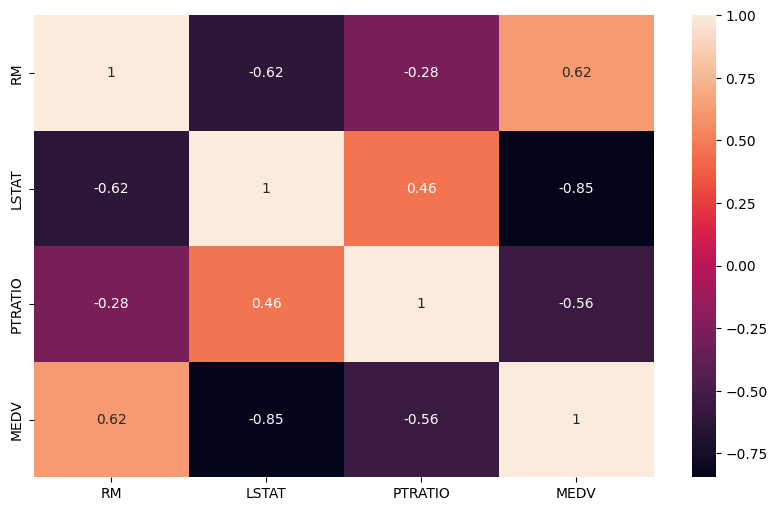

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(correlacao, annot=True)
plt.show()

# **REGRESSÃO LINEAR SIMPLES**

### Valor médio (MEDV) em função do número de cômodos (RM)

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
x1 = df.iloc[:, 0:1].values
x1

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [ ]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size=0.3, random_state=10)

In [ ]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [ ]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressao_linear1 = LinearRegression()
regressao_linear1.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
# INTERCEPT (COEFICIENTE LINEAR)
regressao_linear1.intercept_

-626510.2699464143

In [ ]:
# COEFICIENTE LINEAR
regressao_linear1.coef_

array([173771.45170999])

**Equação: Valor = -626510,27 + 173771,45.número_cômodos**

In [ ]:
# COEFICIENTE DE DETERMINAÇÃO DADOS DE TREINO
regressao_linear1.score(x_treino, y_treino)

0.46368351515551953

In [ ]:
# COEFICIENTE DE DETERMINAÇÃO DADOS DE TESTE
regressao_linear1.score(x_teste, y_teste)

0.5426573915930195

In [ ]:
previsores_treino1 = regressao_linear1.predict(x_teste)
previsores_treino1

array([419593.86934773, 438187.4146807 , 447744.84452475, 480935.19180136,
       491013.93600054, 494836.90793816, 563650.40281531, 438187.4146807 ,
       500745.1372963 , 482151.59196333, 452436.67372092, 452784.21662434,
       585719.37718248, 394744.5517532 , 321239.22767988, 442705.47242516,
       458171.13162735, 446702.21581449, 442357.92952174, 488581.1356766 ,
       592322.69234746, 244432.24602406, 412816.78273104, 540365.02828618,
       421331.58386483, 554092.97297127, 470856.44760218, 369373.91980354,
       732382.48242572, 411947.92547249, 484758.16373898, 514646.8534331 ,
       565561.88878412, 438534.95758412, 661483.73012804, 452957.98807605,
       579984.91927605, 402911.80998357, 351475.46027742, 537063.37070369,
       491535.25035567, 490145.07874199, 637503.26979206, 512735.36746429,
       722825.05258167, 631768.81188563, 489971.30729028, 353039.40334281,
       471551.53340902, 466512.16130943, 446007.13000765, 384492.03610231,
       390747.80836387, 3

In [ ]:
import matplotlib.pyplot as plt

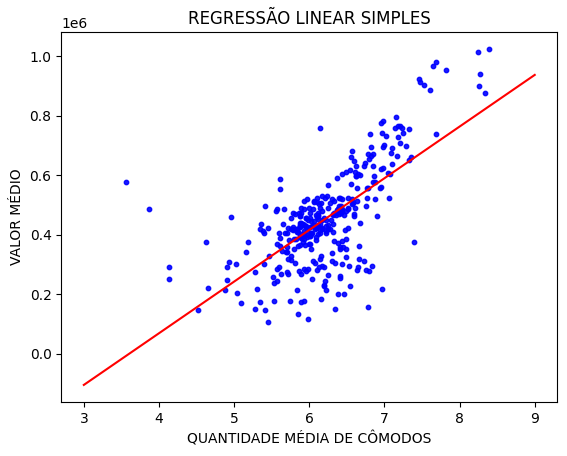

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
x_plot = np.linspace(3, 9)
plt.plot(x_plot, x_plot*regressao_linear1.coef_ + regressao_linear1.intercept_, color='red')
plt.title("REGRESSÃO LINEAR SIMPLES")
plt.xlabel("QUANTIDADE MÉDIA DE CÔMODOS")
plt.ylabel("VALOR MÉDIO")
plt.show()

In [ ]:
previsoes_y_teste = regressao_linear1.predict(x_teste)
previsoes_y_teste

array([419593.86934773, 438187.4146807 , 447744.84452475, 480935.19180136,
       491013.93600054, 494836.90793816, 563650.40281531, 438187.4146807 ,
       500745.1372963 , 482151.59196333, 452436.67372092, 452784.21662434,
       585719.37718248, 394744.5517532 , 321239.22767988, 442705.47242516,
       458171.13162735, 446702.21581449, 442357.92952174, 488581.1356766 ,
       592322.69234746, 244432.24602406, 412816.78273104, 540365.02828618,
       421331.58386483, 554092.97297127, 470856.44760218, 369373.91980354,
       732382.48242572, 411947.92547249, 484758.16373898, 514646.8534331 ,
       565561.88878412, 438534.95758412, 661483.73012804, 452957.98807605,
       579984.91927605, 402911.80998357, 351475.46027742, 537063.37070369,
       491535.25035567, 490145.07874199, 637503.26979206, 512735.36746429,
       722825.05258167, 631768.81188563, 489971.30729028, 353039.40334281,
       471551.53340902, 466512.16130943, 446007.13000765, 384492.03610231,
       390747.80836387, 3

In [ ]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

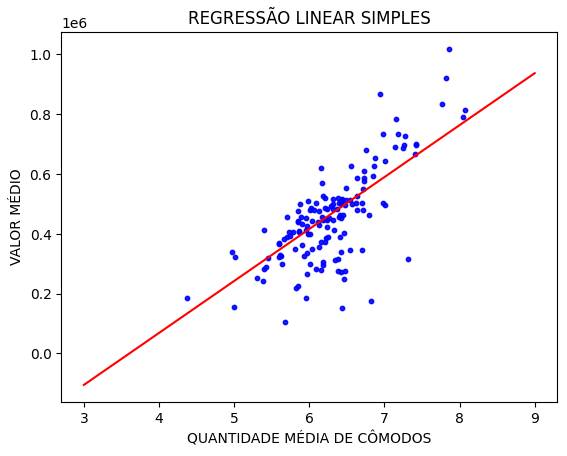

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
plt.plot(x_plot, x_plot*regressao_linear1.coef_ + regressao_linear1.intercept_, color='red')
plt.title("REGRESSÃO LINEAR SIMPLES")
plt.xlabel("QUANTIDADE MÉDIA DE CÔMODOS")
plt.ylabel("VALOR MÉDIO")
plt.show()

In [ ]:
# FAZENDO PREVISÃO PARA VALORES DISTINTOS
valor_casa = regressao_linear1.predict([[4]])
valor_casa

array([68575.53689355])

**Métricas de Desempenho**

In [ ]:
# ERRO ABSOLUTO
abs(y_teste - previsoes_y_teste).mean()

76063.99733079868

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# ERRO MÉDIO ABSOLUTO
mean_absolute_error(y_teste, previsoes_y_teste)

76063.99733079868

In [ ]:
# ERRO MÉDIO QUADRÁTICO
mean_squared_error(y_teste, previsoes_y_teste)

11294624525.740473

In [ ]:
# RAIZ DO ERRO QUADRÁTICO MÉDIO
np.sqrt(mean_squared_error(y_teste, previsoes_y_teste))

106276.17101561607

### Valor médio (MEDV) em função da classe social (LSTAT)

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
x2 = df.iloc[:, 1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [ ]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size=0.3, random_state=10)

In [ ]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [ ]:
y_teste.shape, y_teste.shape

((147,), (147,))

In [ ]:
from sklearn.linear_model import LinearRegression
regressao_linear2 = LinearRegression()
regressao_linear2.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
# INTERCEPTOR (COEFICIENTE ANGURLA)
regressao_linear2.intercept_

681977.7451055486

In [ ]:
# COEFICIENTE ANGULAR
regressao_linear2.coef_

array([-17263.75010515])

**Equação: Valor = 681977.75 - 17263.75.LSTAT**

In [ ]:
# COEFICIENTE DE DETERMINAÇÃO DADOS DE TREINO
regressao_linear2.score(x_treino, y_treino)

0.5688289563355992

In [ ]:
previores_treino2 = regressao_linear2.predict(x_treino)
previores_treino2

array([549564.78179906, 401787.080899  , 547493.13178645, 392982.56834537,
       594968.4445756 , 475330.65634693, 474294.83134062, 172179.20450053,
       525050.25664975, 358109.79313297, 527812.45666658, 386940.25580857,
       595141.08207665, 451851.95620393, 590825.14455037, 383660.14328859,
       624489.45725541, 543004.55675911, 413526.4309705 , 422676.21852623,
       572180.29443681, 457548.99373862, 507095.9565404 , 397643.78087376,
       492594.40645207, 610505.81967024, 365533.20567819, 611541.64467654,
       527639.81916553, 401959.71840005, 578740.51947676, 435624.03110509,
       370021.78070552, 342054.50553518, 530229.3816813 , 587027.11952723,
       274553.24262406, 554743.90683061, 563548.41938423, 562339.95687687,
       420086.65601045, 613785.93219021, 536271.6942181 , 515555.19409192,
       280250.28015875, 437005.1311135 , 499672.54399519, 541105.54424754,
       359836.16814349, 475158.01884588, 422676.21852623, 533336.85670022,
       579948.98198412, 5

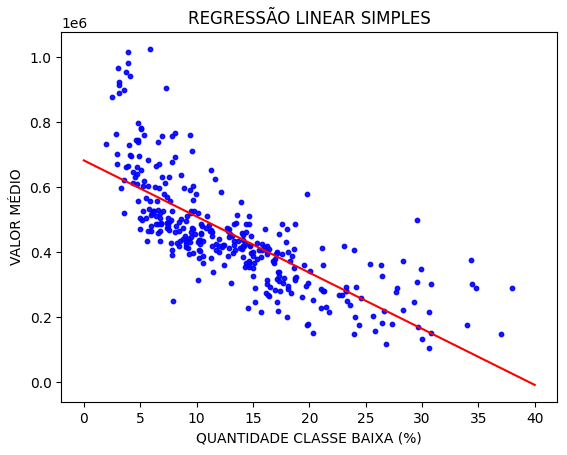

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
x_plot = np.linspace(0, 40)
plt.plot(x_plot, x_plot*regressao_linear2.coef_ + regressao_linear2.intercept_, color='red')
plt.title("REGRESSÃO LINEAR SIMPLES")
plt.xlabel("QUANTIDADE CLASSE BAIXA (%)")
plt.ylabel("VALOR MÉDIO")
plt.show()

In [ ]:
previsores_test2 = regressao_linear2.predict(x_teste)
previsores_test2

array([507441.2315425 , 438731.50612401, 518490.0316098 , 500708.36900149,
       594277.8945714 , 539897.08174018, 551981.70681378, 483789.89389845,
       580121.61948518, 272999.50511459, 558714.56935479, 553535.44432325,
       584610.19451251, 472395.81882905, 370194.41820658, 454959.43122285,
       496565.06897626, 474122.19383957, 363288.91816452, 348614.73057514,
       426646.88105041, 472741.09383115, 480855.05638057, 506578.04403724,
       357419.24312877, 570108.64442419, 573388.75694417, 447018.10617448,
       620346.15723017, 353793.85560668, 452887.78121023, 521770.14412977,
       562512.59437792, 420949.84351571, 591343.05705352, 378135.74325494,
       602737.13212292, 400578.61839164, 394536.30585483, 558024.01935059,
       180465.804551  , 557678.74434848, 567691.71940947, 603255.04462607,
       551463.79431063, 587199.75702829, 474294.83134062, 365360.56817713,
       490350.11893841, 601356.03211451, 351376.93059196, 300276.23028073,
       271273.13010408, 4

In [ ]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

In [ ]:
# COEFICIENTE DE DETERMINAÇÃO DADOS DE TESTE
regressao_linear2.score(x_teste, y_teste)

0.6006038196307664

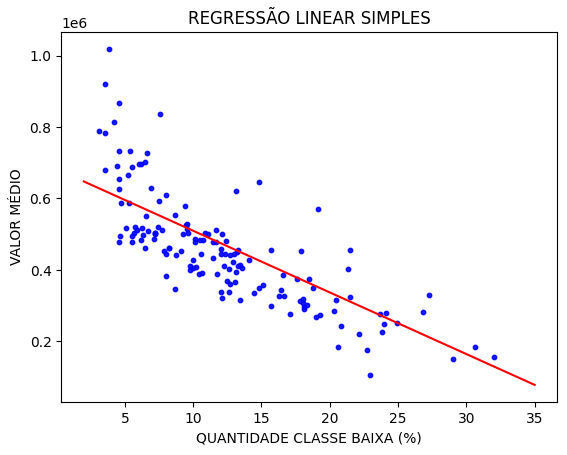

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
x_plot = np.linspace(2, 35)
plt.plot(x_plot, x_plot*regressao_linear2.coef_ + regressao_linear2.intercept_, color='red')
plt.title("REGRESSÃO LINEAR SIMPLES")
plt.xlabel("QUANTIDADE CLASSE BAIXA (%)")
plt.ylabel("VALOR MÉDIO")
plt.show()

In [ ]:
# FAZENDO PREVISÕES PARA VALORES DISTINTOS
valor_casa = regressao_linear2.predict([[20]])
valor_casa

array([336702.74300259])

MÉTRICAS DE DESEMPENHO

In [ ]:
# ERRO ABSOLUTO
abs(y_teste - previsores_test2).mean()

76340.55192245146

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# ERRO MÉDIO ABSOLUTO
mean_absolute_error(y_teste, previsores_test2)

76340.55192245146

In [ ]:
# ERRO QUADRÁTICO MÉDIO
mean_squared_error(y_teste, previsores_test2)

9863567949.634668

In [ ]:
# RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
np.sqrt(mean_squared_error(y_teste, previsores_test2))

99315.49702657017

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# SEPARANDO OS DADOS EM FOLD
KFold = KFold(n_splits=15, shuffle=True, random_state=5)

In [ ]:
# CRIANDO O MODELO
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv=KFold)
resultado

array([0.73997836, 0.52496442, 0.2753212 , 0.77336843, 0.7096672 ,
       0.34726472, 0.66194425, 0.68820343, 0.411042  , 0.5519506 ,
       0.5776707 , 0.37648029, 0.60443851, 0.64797086, 0.5056103 ])

In [ ]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 55.97%


### Valor médio (MEDV) em função da classe social (PTRATIO)

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
x3 = df.iloc[:, 2:3].values
x3

array([[15.3],
       [17.8],
       [17.8],
       [18.7],
       [18.7],
       [18.7],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [15.2],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [21. ],
       [19.2],
       [19.2],
       [19.2],
       [19.2],
       [18.3],
       [18.3],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [17.9],
       [16.8],
       [16.8],
       [16.8],
       [16.8],
       [21.1],
       [17.9],
       [17.3],
       [15.1],
       [19.7],
       [19.7],
       [19.7],
       [19.7],
       [19.7],
       [19.7],
       [18.6],
       [16.1],
       [16

In [ ]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x3, y, test_size=0.3, random_state=10)

In [ ]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [ ]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [ ]:
from sklearn.linear_model import LinearRegression
regressao_linear3 = LinearRegression()
regressao_linear3.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
# INTERCEPTO (COEFICIENTE LINEAR)
regressao_linear3.intercept_

1249904.1850767543

In [ ]:
# COERICIENTE ANGULAR
regressao_linear3.coef_

array([-42872.50441416])

**Equação: Valor = 1249904.18 + -42872.50.PTRATIO**

In [ ]:
# COEFICENTE DE DETERMINAÇÃO DADOS DE TREINO
regressao_linear3.score(x_treino, y_treino)

0.2981454757369286

In [ ]:
# COEFICENTE DE DETERMINAÇÃO DADOS DE TESTE
regressao_linear3.score(x_teste, y_teste)

0.18894714160445847

In [ ]:
previsores_treino3 = regressao_linear3.predict(x_treino)
previsores_treino3

array([353868.84282081, 383879.59591072, 692561.62769267, 383879.59591072,
       486773.6065047 , 448188.35253196, 619678.3701886 , 619678.3701886 ,
       525358.86047745, 383879.59591072, 461050.10385621, 486773.6065047 ,
       581093.11621585, 383879.59591072, 529646.11091886, 349581.59237939,
       426752.10032488, 452475.60297337, 353868.84282081, 619678.3701886 ,
       482486.35606329, 353868.84282081, 426752.10032488, 353868.84282081,
       452475.60297337, 503922.60827037, 461050.10385621, 709710.62945834,
       448188.35253196, 383879.59591072, 461050.10385621, 431039.35076629,
       388166.84635213, 383879.59591072, 439613.85164913, 619678.3701886 ,
       383879.59591072, 538220.61180169, 405315.8481178 , 461050.10385621,
       383879.59591072, 602529.36842293, 456762.85341479, 538220.61180169,
       383879.59591072, 383879.59591072, 383879.59591072, 469624.60473904,
       353868.84282081, 349581.59237939, 383879.59591072, 709710.62945834,
       692561.62769267, 4

In [ ]:
import matplotlib.pyplot as plt

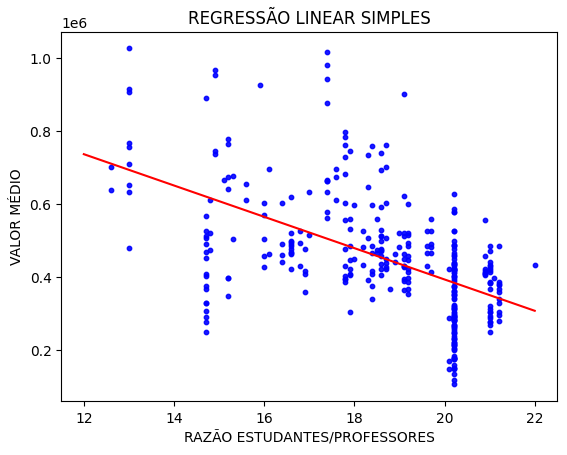

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
x_plot = np.linspace(12, 22)
plt.plot(x_plot, x_plot*regressao_linear3.coef_ + regressao_linear3.intercept_, color='red')
plt.title("REGRESSÃO LINEAR SIMPLES")
plt.xlabel("RAZÃO ESTUDANTES/PROFESSORES")
plt.ylabel("VALOR MÉDIO")
plt.show()

In [ ]:
previsores_teste3 = regressao_linear3.predict(x_teste)
previsores_teste3

array([538220.61180169, 353868.84282081, 452475.60297337, 546795.11268453,
       409603.09855921, 593954.8675401 , 461050.10385621, 383879.59591072,
       431039.35076629, 383879.59591072, 538220.61180169, 482486.35606329,
       349581.59237939, 619678.3701886 , 388166.84635213, 486773.6065047 ,
       383879.59591072, 486773.6065047 , 341007.09149656, 383879.59591072,
       692561.62769267, 619678.3701886 , 503922.60827037, 486773.6065047 ,
       482486.35606329, 349581.59237939, 538220.61180169, 486773.6065047 ,
       478199.10562187, 383879.59591072, 383879.59591072, 461050.10385621,
       538220.61180169, 619678.3701886 , 503922.60827037, 383879.59591072,
       619678.3701886 , 349581.59237939, 619678.3701886 , 495348.10738753,
       383879.59591072, 409603.09855921, 709710.62945834, 598242.11798152,
       486773.6065047 , 585380.36665727, 383879.59591072, 341007.09149656,
       619678.3701886 , 559656.86400877, 598242.11798152, 383879.59591072,
       383879.59591072, 6

In [ ]:
y_teste

array([ 487200.,  428400.,  525000.,  483000.,  516600.,  462000.,
        592200.,  476700.,  512400.,  275100.,  487200.,  518700.,
        501900.,  499800.,  319200.,  621600.,  483000.,  445200.,
        373800.,  273000.,  644700.,  321300.,  510300.,  478800.,
        348600.,  462000.,  516600.,  405300.,  919800.,  266700.,
        455700.,  499800.,  627900.,  357000.,  665700.,  373800.,
        867300.,  327600.,  327600.,  501900.,  151200.,  499800.,
        726600.,  625800.,  835800.,  686700.,  338100.,  300300.,
        499800.,  493500.,  569100.,  220500.,  226800.,  411600.,
        478800.,  241500.,  655200.,  432600.,  441000.,  405300.,
        462000.,  252000.,  495600.,  577500.,  512400.,  392700.,
        279300.,  480900.,  497700.,  554400.,  399000.,  369600.,
        315000.,  445200.,  585900.,  105000.,  388500.,  453600.,
        312900.,  336000.,  315000.,  501900.,  323400.,  476700.,
        382200.,  609000.,  390600.,  413700.,  426300.,  2835

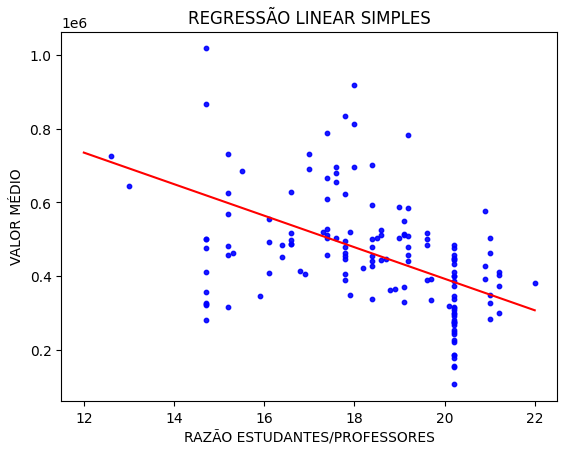

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
x_plot = np.linspace(12, 22)
plt.plot(x_plot, x_plot*regressao_linear3.coef_ + regressao_linear3.intercept_, color='red')
plt.title("REGRESSÃO LINEAR SIMPLES")
plt.xlabel("RAZÃO ESTUDANTES/PROFESSORES")
plt.ylabel("VALOR MÉDIO")
plt.show()

In [ ]:
valor_casa = regressao_linear3.predict([[15]])
valor_casa

array([606816.61886435])

## **AVALIANDO A REGRESSÃO LINEAR SIMPLES COM STATSMODEL**

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x2 = df.iloc[:, 1:2].values
x2

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [ ]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [ ]:
# CRIAÇÃO DO MODELO
regressao = smf.ols(formula='y ~ x2', data=df).fit()

In [ ]:
residuos = regressao.resid
residuos

,0
0,-91698.432398
1,-68220.791356
2,116130.471691
3,69473.109014
4,170717.234516
...,...
484,-42008.495743
485,-90286.334256
486,-82077.460502
487,-107059.859907


## **TESTE DE NORMALIDADE DE RESÍDUOS**

Ho = Distribuição normal: p > 0,05

Ha = Distribuição != normal: p <= 0,05

In [ ]:
estatistica, p = stats.shapiro(residuos)
print("Estatística = {}, p-valor = {}".format(estatistica, p))

Estatística = 0.9171057147431392, p-valor = 9.78292336065136e-16


In [ ]:
import scipy.stats as stats

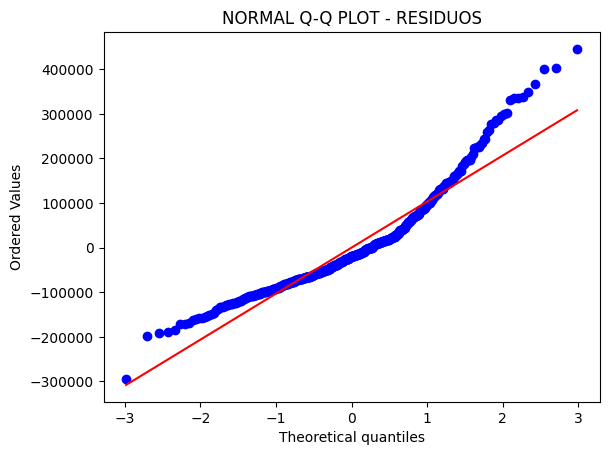

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("NORMAL Q-Q PLOT - RESIDUOS")
plt.show()

## **ANÁLISE DE HOMOCEDACIDADE DOS RESÍDUOS**

(RESÍDUOS COM VARIAÇÃO CONSTATE)

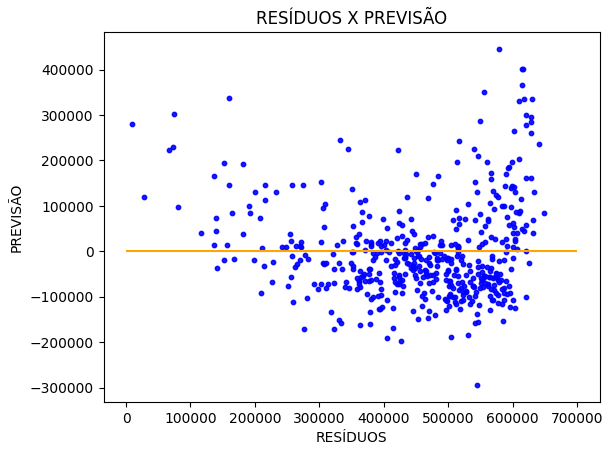

In [ ]:
plt.scatter(y=residuos, x=regressao.predict(), color='blue', s=10, alpha=0.9)
plt.hlines(y=0, xmin=0, xmax=700000, color='orange')
plt.xlabel("RESÍDUOS")
plt.ylabel("PREVISÃO")
plt.title("RESÍDUOS X PREVISÃO");

Não tivemos uma homocedacidade, mas sim, uma heterocidade, ou seja, temos uma inconsistência